In [2]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
import matplotlib 
import matplotlib.pyplot as plt
# For higher resoltion figures
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300

matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
plt.rcParams["font.family"] = "Helvetica" #somethings this one doesnt work
plt.rcParams['pdf.fonttype'] = 42

In [5]:
# Parsing the yn00 output
# Extracting pairwise dN/dS for all seqs
def get_dn_ds(file):

    with open(file, "r") as f:
        lines = f.readlines()
    species = []
    dn_ds_1 = []
    dn_ds_2 = []
    dn_ds_3 = []

    for i, line in enumerate(lines):
        if re.search(r"^\d", line):
            match = re.search(r"^\d+ (\(.+\)) vs. \d+ (\(.+\))", line)
            species1 = match.group(1).replace(")", "").replace("(", "")
            species2 = match.group(2).replace(")", "").replace("(", "")

            match2 = re.search(r"LWL85:\s+dS\s+=\s+([\d\.]+)\s+dN\s+=\s+([\d\.]+)\s+w\s+=\s+([\d\.]+)\s+S\s+=\s+([\d\.]+)\s+N\s+=\s+([\d\.]+)", lines[i+7])
            if match2:
                LWL85 = match2.group(3)
            else: 
                LWL85 = "nan"

            match3 = re.search(r"LWL85m:\s+dS\s+=\s+([\d\.]+)\s+dN\s+=\s+([\d\.]+)\s+w\s+=\s+([\d\.]+)\s+S\s+=\s+([\d\.]+)\s+N\s+=\s+([\d\.]+)", lines[i+8])
            if match3:
                LWL85m = match3.group(3)
            else: 
                LWL85m = "nan"

            match4 = re.search(r"LPB93:\s+dS\s+=\s+([\d\.]+)\s+dN\s+=\s+([\d\.]+)\s+w\s+=\s+([\d\.]+)", lines[i+9])
            if match4:
                LPB93 = match4.group(3)
            else: 
                LPB93 = "nan"

            species.append((species1, species2))
            dn_ds_1.append(LWL85)
            dn_ds_2.append(LWL85m)
            dn_ds_3.append(LPB93)

    return pd.DataFrame({'species' : species, 'LWL84' : dn_ds_1, 'LWL85m' : dn_ds_2, 'LPB93' : dn_ds_3})


In [6]:
DBD_w = get_dn_ds("pairwise_omega_DBD.txt")
IDR_w = get_dn_ds("pairwise_omega-IDR.txt")
overall_w = get_dn_ds("pairwise_omega.txt")

Text(0, 0.5, 'Count')

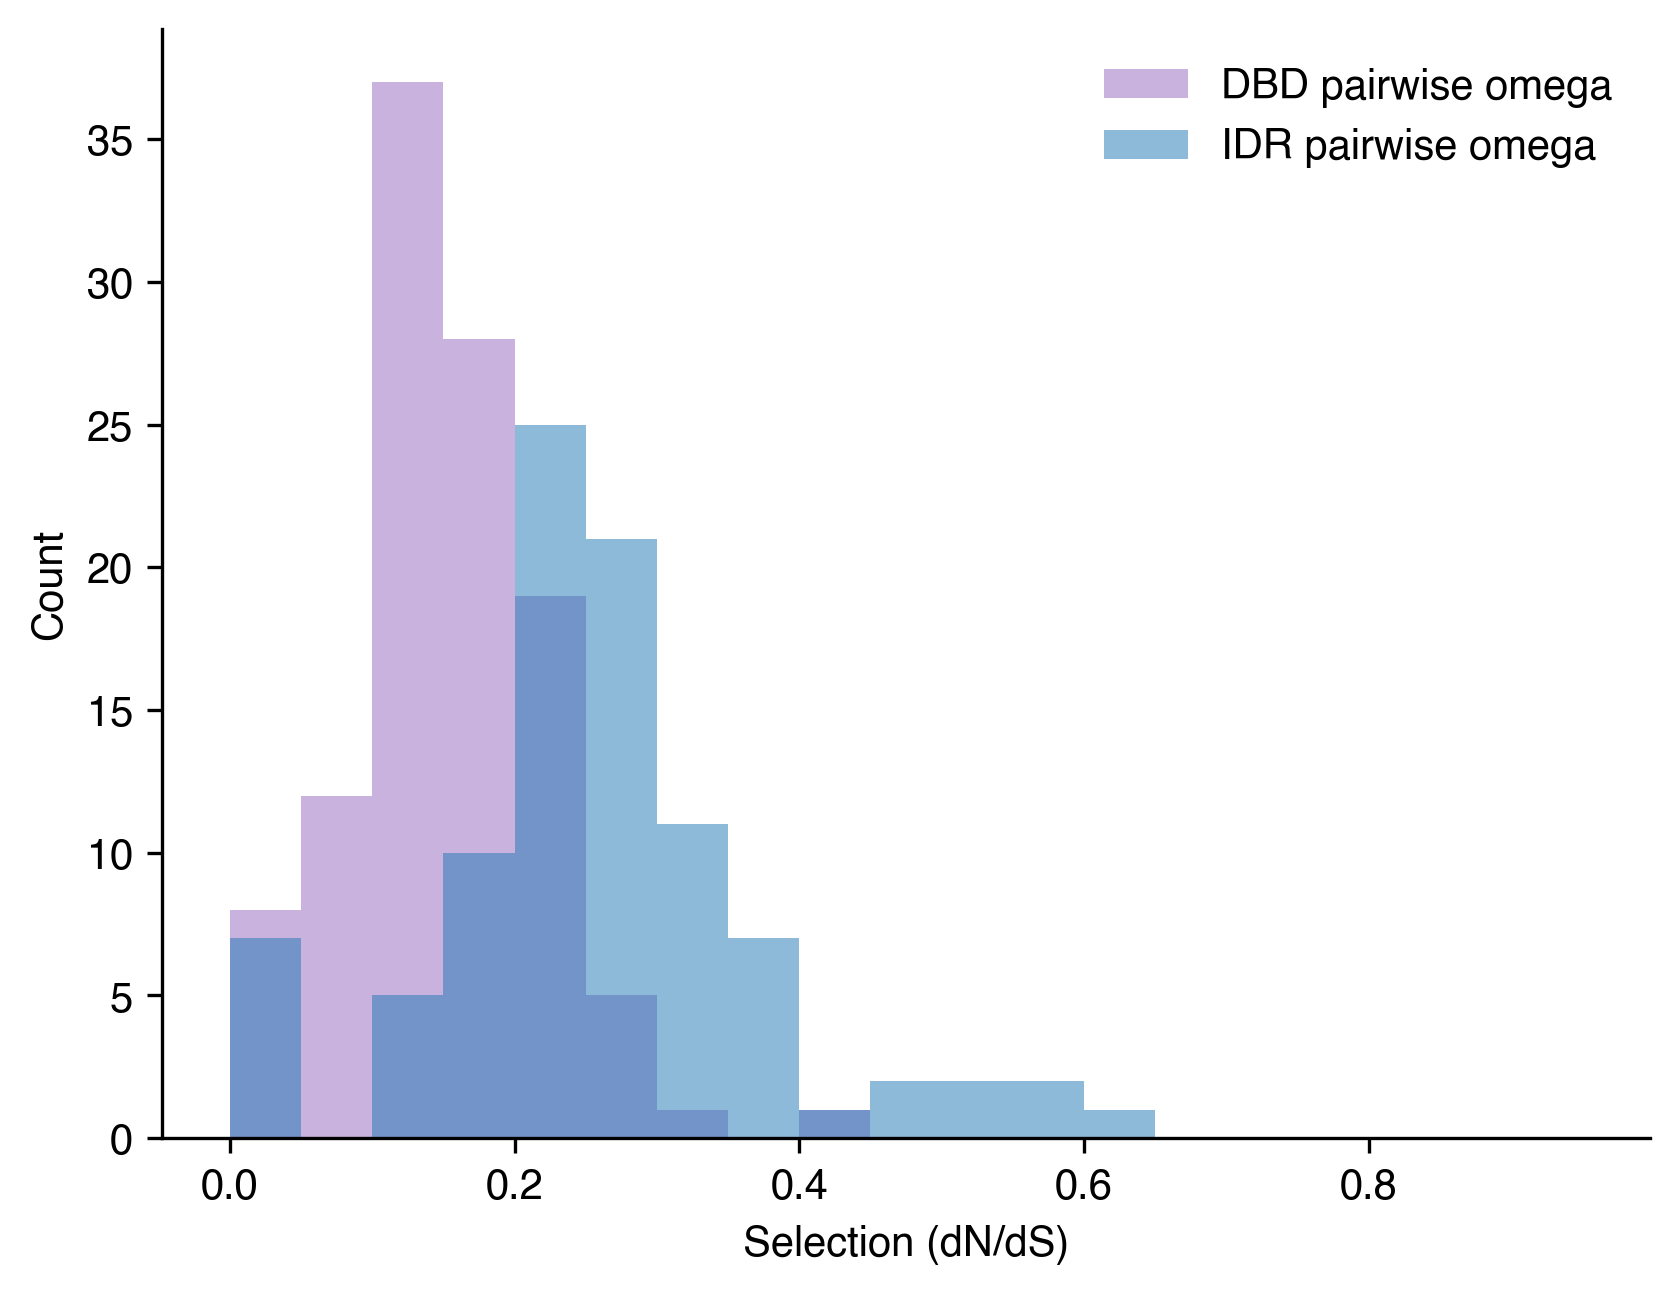

In [13]:
bins = np.arange(0, 1, 0.05)

# plt.hist(overall_w['LWL84'].astype('float'), bins=bins, alpha=0.5, label="Overall pairwise omega")
plt.hist(DBD_w['LWL84'].dropna().astype('float'), bins=bins, alpha=0.5, label="DBD pairwise omega", color="C4")
plt.hist(IDR_w['LWL84'].dropna().astype('float'), bins=bins, alpha=0.5, label="IDR pairwise omega", color="C0")
plt.legend(frameon=False)
sns.despine()
plt.xlabel("Selection (dN/dS)")
plt.ylabel("Count")

In [77]:
DBD_w.columns

Index(['species', 'LWL84', 'LWL85m', 'LPB93'], dtype='object')

Text(0, 0.5, 'Count')

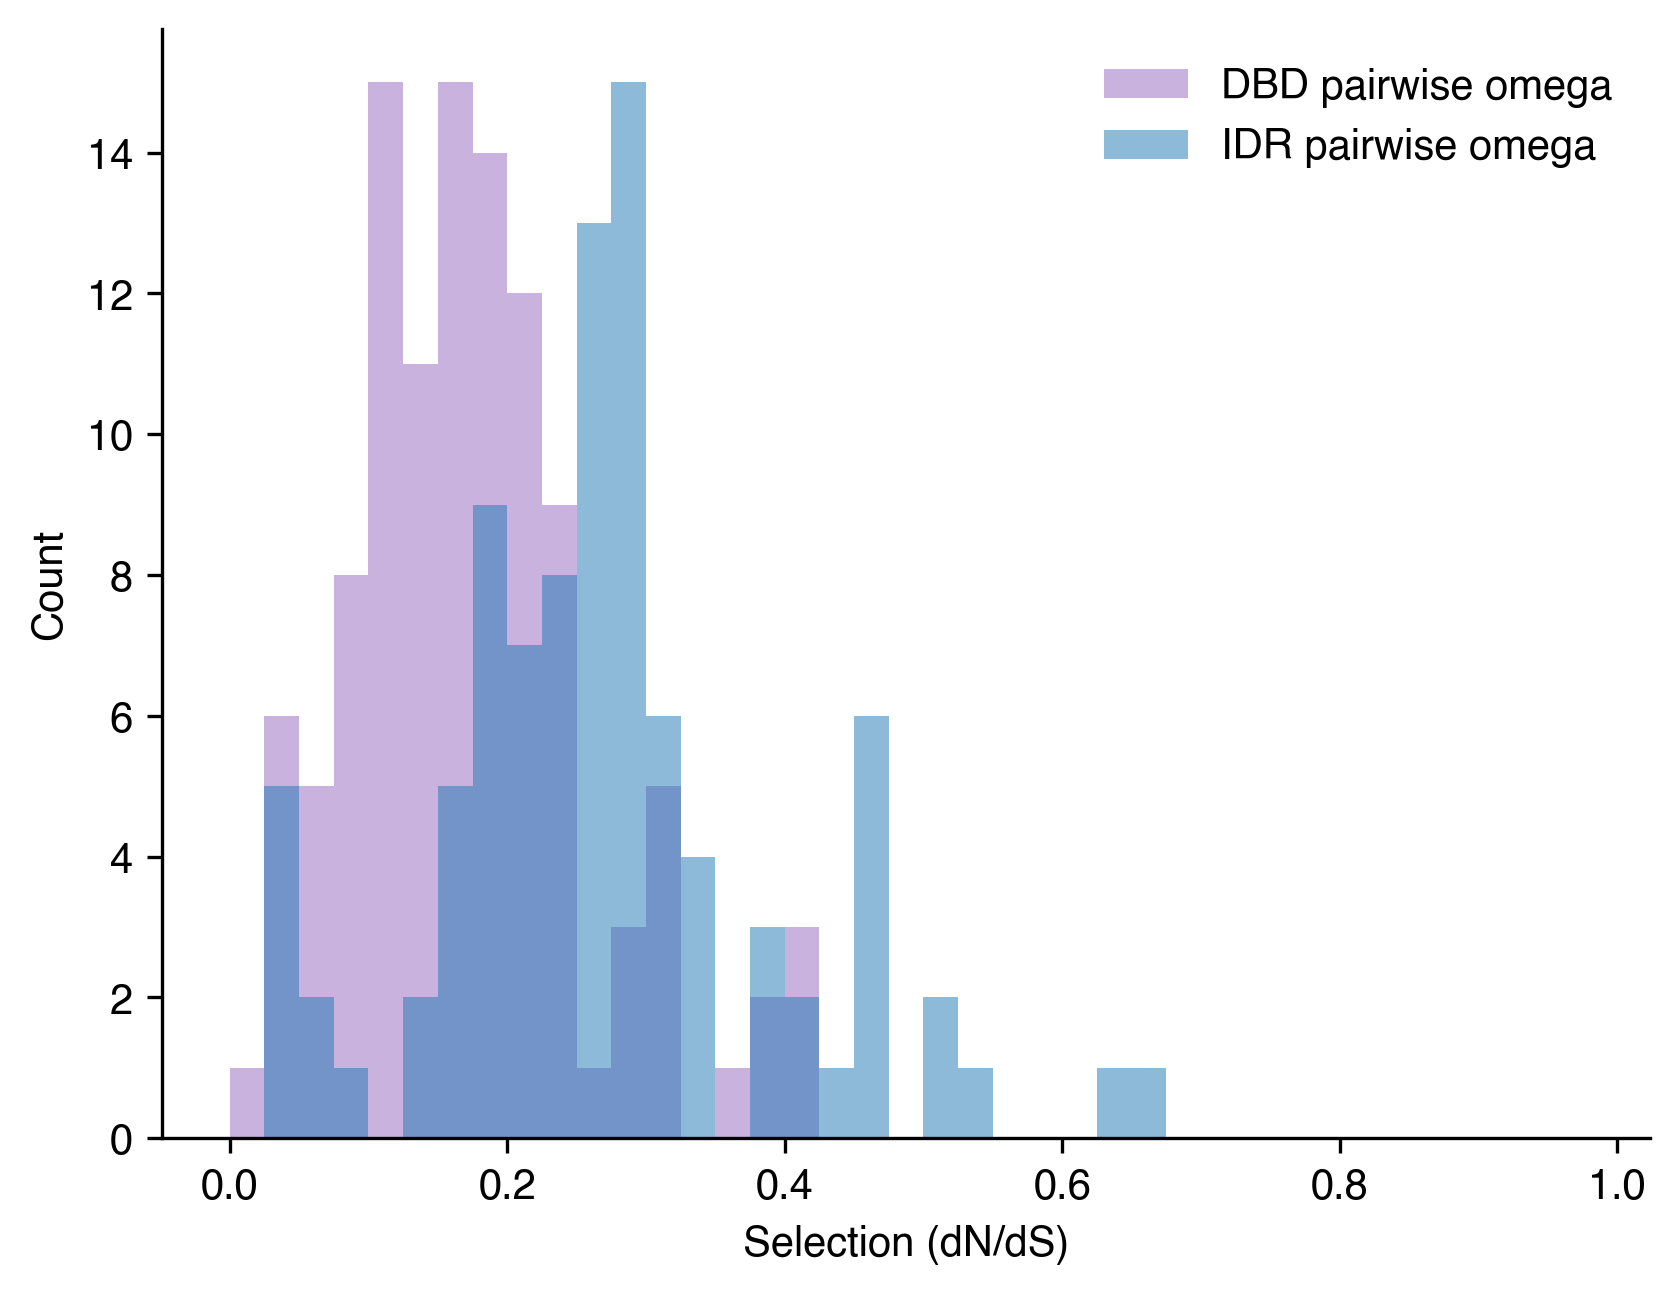

In [15]:
bins = np.arange(0, 1, 0.025)

# plt.hist(overall_w['LWL84'].astype('float'), bins=bins, alpha=0.5, label="Overall pairwise omega")
plt.hist(DBD_w['LWL85m'].dropna().astype('float'), bins=bins, alpha=0.5, label="DBD pairwise omega", color="C4")
plt.hist(IDR_w['LWL85m'].dropna().astype('float'), bins=bins, alpha=0.5, label="IDR pairwise omega", color="C0")
plt.legend(frameon=False)
sns.despine()
plt.xlabel("Selection (dN/dS)")
plt.ylabel("Count")

<>:4: SyntaxWarning: invalid escape sequence '\o'
<>:4: SyntaxWarning: invalid escape sequence '\o'
/var/folders/34/1pw3__x51kdfyh3vk72f5vc80000gn/T/ipykernel_15603/3488235252.py:4: SyntaxWarning: invalid escape sequence '\o'
  plt.hist(DBD_w['LPB93'].dropna().astype('float'), bins=bins, alpha=0.5, label="DBD pairwise $\omega$", color="C4")
1 extra bytes in post.stringData array
'created' timestamp seems very low; regarding as unix timestamp


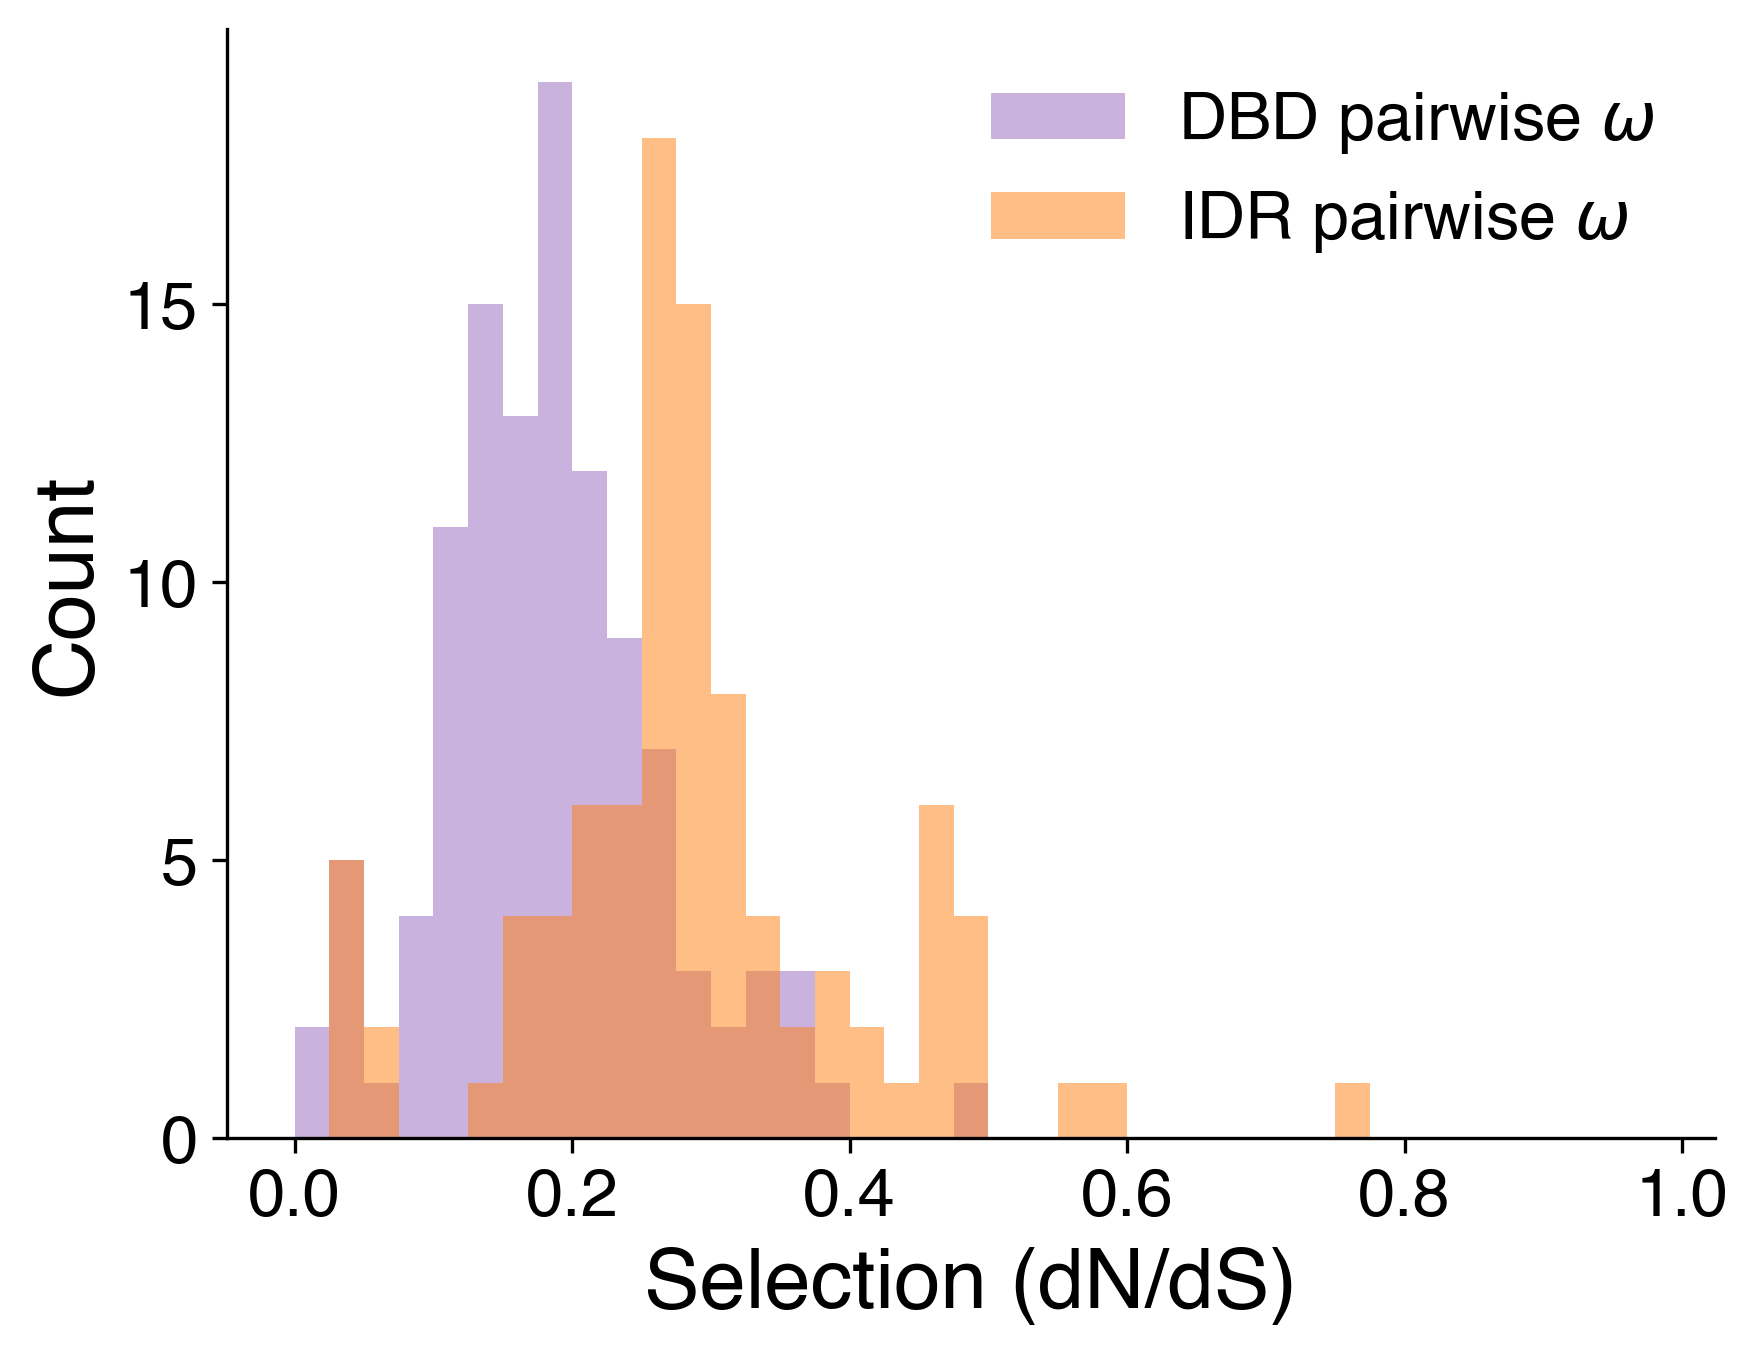

In [43]:
bins = np.arange(0, 1, 0.025)

# plt.hist(overall_w['LWL84'].astype('float'), bins=bins, alpha=0.5, label="Overall pairwise omega")
plt.hist(DBD_w['LPB93'].dropna().astype('float'), bins=bins, alpha=0.5, label="DBD pairwise $\omega$", color="C4")
plt.hist(IDR_w['LPB93'].dropna().astype('float'), bins=bins, alpha=0.5, label=r"IDR pairwise $\omega$", color="C1")
plt.legend(frameon=False, fontsize=16)
sns.despine()
plt.xlabel("Selection (dN/dS)", fontsize=20)
plt.ylabel("Count", fontsize=20)
plt.xticks(fontsize=16)
plt.yticks([0, 5, 10, 15], fontsize=16)

plt.savefig("../figures/LPB93_dN_dS.pdf", format='pdf', bbox_inches='tight')